In [1]:
import keras
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from utils import progressBar
from metrics import Metric

import data_utils
from mdp import MDP
from rewards import reward_func_linear, reward_func_decay, reward_func_simple_decay  # Call it with stats to initialize
from env import Env
from regression import RegressionAlgo
from policy import EpsilonGreedyPolicy, GreedyPolicy, AlwaysDoPolicy, RandomPolicy, PositiveRewardPolicy

Using TensorFlow backend.


In [2]:
data = data_utils.Data(small = False)

100%|██████████| 53/53 [00:26<00:00,  1.36it/s]


In [66]:
mdp = MDP(data=data)
# Simple decay as reward
reward_func = reward_func_linear(data.statistics, verbose=False, init_cost = 0.8)
env = Env(reward_func=reward_func, mode = 'machine')
# policy = EpsilonGreedyPolicy(action_space = mdp.action_space)
policy = RandomPolicy(action_space = mdp.action_space)
# test_policy = GreedyPolicy(action_space = mdp.action_space)

In [67]:
algo = RegressionAlgo(mdp = mdp, env = env, policy = policy)

In [68]:
algo.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               131968    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 140,354
Trainable params: 140,354
Non-trainable params: 0
_________________________________________________________________


In [69]:
algo.collect_data(n = 3)

100%|██████████| 137448/137448 [00:28<00:00, 4886.98it/s]


In [70]:
algo.fit(epochs = 1)

Epoch 1/1
137448/137448 [==============================] - 57s 413us/step - loss: 0.0314


In [71]:
# algo.test(policy=RandomPolicy(action_space=algo.mdp.action_space))
algo.test(policy=GreedyPolicy(action_space=algo.mdp.action_space), visualize=False)

100%|██████████| 5329/5329 [00:04<00:00, 1225.31it/s]


In [72]:
def plot(algo, mode):
    # mode = 'test'
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(mode)
    axes = axes.flatten()

    axes[0].set_title("Accumulated reward over time")
    axes[0].plot(algo.metrics[mode]['accumulated_reward'].history)

    axes[1].set_title("Actual and predicted rewards")
    rewards = np.array(algo.metrics[mode]['reward'].history)
    pred_rewards = np.array(algo.metrics[mode]['pred_reward'].history)
    idx = np.argsort(rewards)
    axes[1].plot(rewards[idx])
    axes[1].plot(pred_rewards[idx, 0])
    axes[1].plot(pred_rewards[idx, 1])
    

#     pts = []
#     action_sum = 0
#     num_choices = 0
#     for t in algo.metrics[mode]['action_per_track'].history:
#         pts.append(np.mean(t) * 100)
#         action_sum += sum(t)
#         num_choices += len(t)
        
#     axes[2].set_title("Percentage of actions per track")
#     pts = np.sort(pts)
#     axes[2].set_yticks(np.arange(0, 101, step=7))
#     axes[2].set_xticks(np.arange(0))
#     axes[2].set_xlabel("track")
#     axes[2].set_ylabel("percentage")
#     axes[2].scatter(range(len(pts)), pts, s=2)
    pred_rewards = np.array(algo.metrics[mode]['pred_reward'].history)
    print("Ratio of actions taken", np.sum(np.argmax(pred_rewards, axis = -1)) / len(pred_rewards))
    plt.show()


Ratio of actions taken 0.43047476074310376


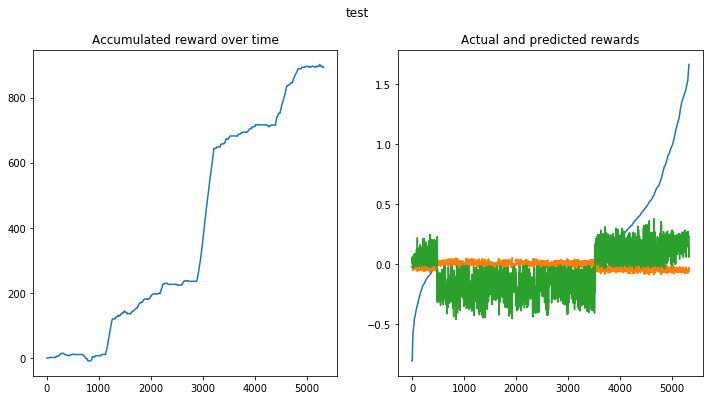

In [73]:
# Plot Random Policy Test
plot(algo, 'test')